# Titulo
## Subtitulo

In [2]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo mensagens informativas para cada passo
print("Bibliotecas importadas com sucesso!")

# Lendo o arquivo CSV (ajustando o separador se necessário)
file_path = 'sdss.csv'  # Substitua pelo caminho correto se estiver em outro ambiente
df = pd.read_csv(file_path, skiprows=1)
# Mantendo apenas as primeiras 50 mil linhas
#df = df.head(200000)

# Exibindo as 5 primeiras linhas para verificar se os dados foram carregados corretamente
print("Dados carregados com sucesso! Primeiras 5 linhas:")
print(df.head())

# Exibindo o tamanho do dataset
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")


Bibliotecas importadas com sucesso!
Dados carregados com sucesso! Primeiras 5 linhas:
                 objid          ra        dec         u         g         r  \
0  1237666211927687614  266.621864  26.717041  18.74441  17.24021  16.67171   
1  1237667538011422731  159.771218  22.902207  18.18608  18.04931  17.75193   
2  1237667538012012625  161.184315  23.139441  19.26410  17.77944  17.10706   
3  1237665126940475445  204.405758  32.316683  18.39461  17.40648  16.99087   
4  1237667209982246991  158.594356  26.142638  18.15396  17.23699  16.91828   

          i         z   run  rerun  camcol  field             specobjid  \
0  16.48060  16.37055  4828    301       6    116   2457961876630300672   
1  17.73256  17.78253  5137    301       4    308   7235187389022623744   
2  16.82521  16.66497  5137    301       4    317   3660407331679739904   
3  16.61687  16.49783  4576    301       1    557   2374552923406362624   
4  16.76634  16.73904  5061    301       1    292  1177932081803


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  uint64 
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(8), int64(8), object(

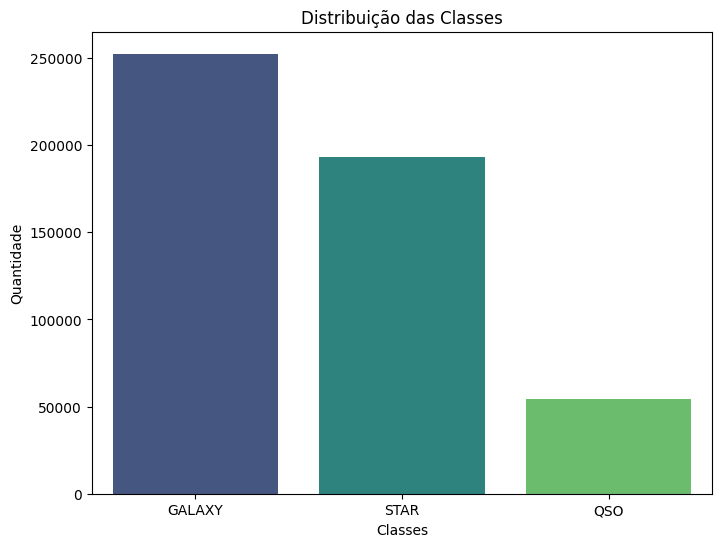


Gerando histogramas para as principais features...


/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

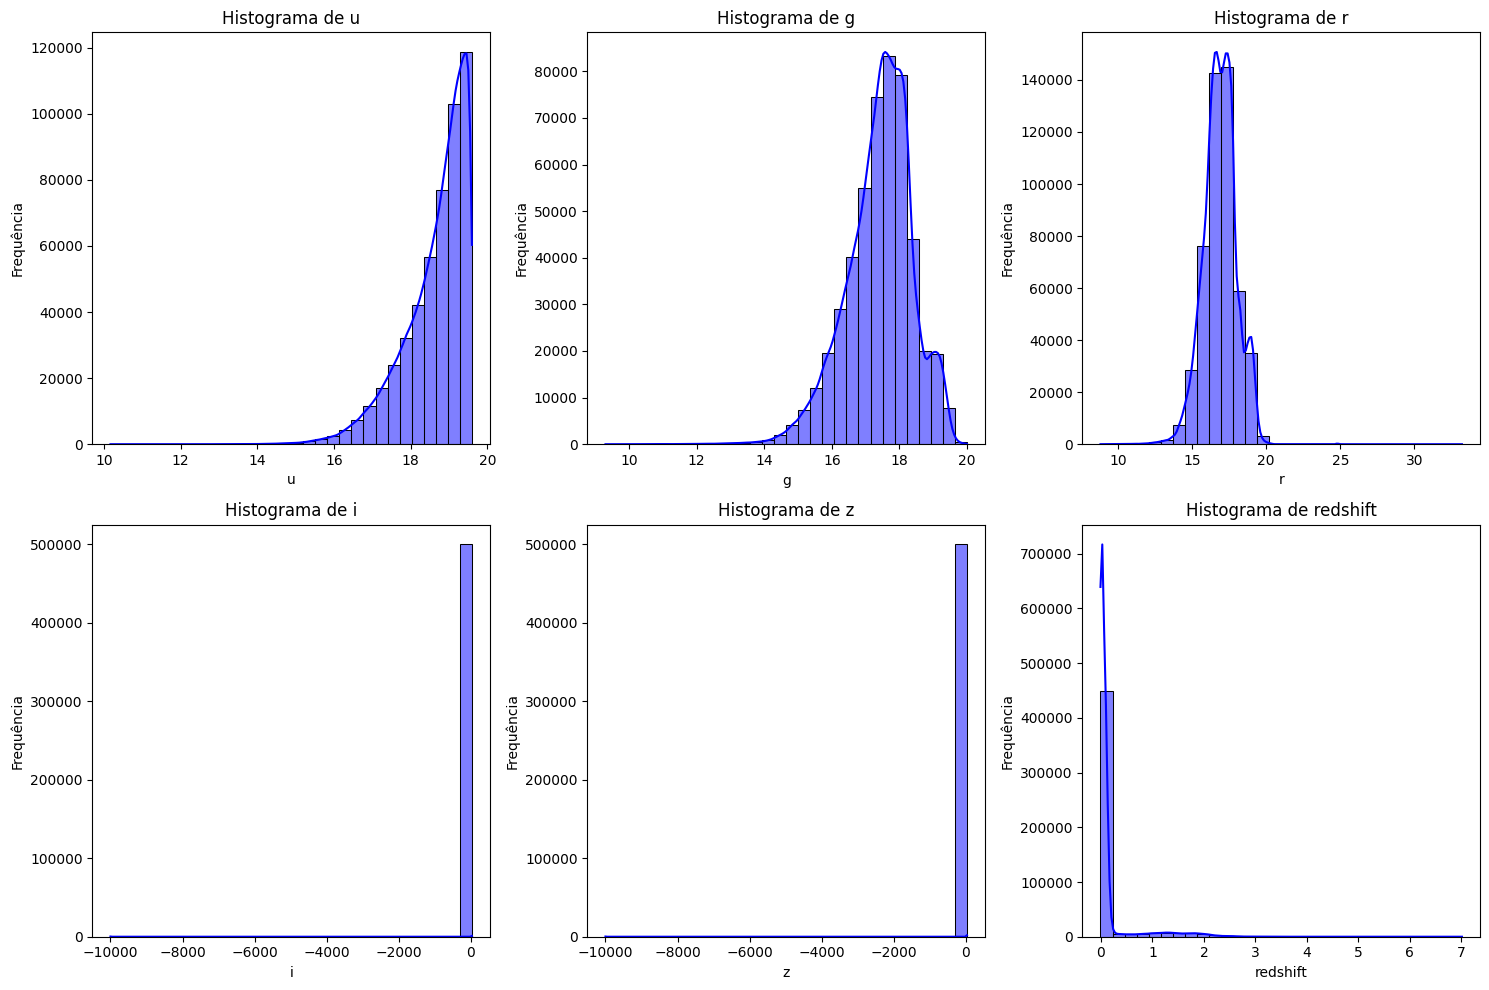

Análise dos dados concluída com sucesso!


In [3]:
# Exibindo informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Exibindo a contagem de valores únicos para a coluna de classificação
print("\nDistribuição das classes (quantidade de estrelas, galáxias e quasares):")
print(df['class'].value_counts())

# Plotando a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index, palette='viridis')
plt.title("Distribuição das Classes")
plt.xlabel("Classes")
plt.ylabel("Quantidade")
plt.show()

# Selecionando algumas features principais para análise (por exemplo, 'u', 'g', 'r', 'i', 'z')
features = ['u', 'g', 'r', 'i', 'z','redshift']

# Substituindo valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Removendo linhas com valores NaN (se necessário)
df.dropna(inplace=True)

# Gerando histogramas para as principais features
print("\nGerando histogramas para as principais features...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histograma de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

print("Análise dos dados concluída com sucesso!")


In [4]:
# 1. Verificando valores nulos ou em branco
print("\nVerificando valores nulos no dataset:")
print(df.isnull().sum())

# Se existirem valores nulos, vamos removê-los
if df.isnull().sum().sum() > 0:
    print("\nExistem valores nulos. Removendo essas linhas...")
    df.dropna(inplace=True)
    print("Valores nulos removidos.")

# 2. Guardando os nomes das colunas
colunas_originais = df.columns.tolist()
print("\nColunas originais guardadas para referência futura.")

# 3. Verificando e mapeando os labels (encoding das classes)
print("\nClasses únicas no dataset:")
print(df['class'].unique())

# Mapear as classes para valores numéricos
class_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}
df['class'] = df['class'].map(class_mapping)

print("\nClasses mapeadas para valores numéricos:")
print(class_mapping)

# 4. Dropar dados desnecessários (Exemplo: colunas irrelevantes)
# Aqui você pode ajustar conforme o caso (e.g., IDs únicos que não ajudam na classificação)
columns_to_drop = ['objid', 'specobjid']  # Exemplos de colunas desnecessárias
#columns_to_drop = ['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'ra', 'dec']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print(f"\nColunas desnecessárias removidas: {columns_to_drop}")

# 5. Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df.drop('class', axis=1)  # Excluindo a coluna alvo para normalizar apenas as features
target = df['class']

features_scaled = scaler.fit_transform(features)
print("\nNormalização das features concluída.")

# Atualizando o DataFrame com os dados normalizados
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['class'] = target.values

print("\nDataset preparado com sucesso!")



Verificando valores nulos no dataset:
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Colunas originais guardadas para referência futura.

Classes únicas no dataset:
['STAR' 'QSO' 'GALAXY']

Classes mapeadas para valores numéricos:
{'STAR': 0, 'GALAXY': 1, 'QSO': 2}

Colunas desnecessárias removidas: ['objid', 'specobjid']

Normalização das features concluída.

Dataset preparado com sucesso!


In [5]:
from sklearn.model_selection import train_test_split

# Separando features (X) e target (y)
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Exibindo as dimensões dos conjuntos
print(f"Conjunto de treinamento: {X_train.shape[0]} amostras, {X_train.shape[1]} features")
print(f"Conjunto de teste: {X_test.shape[0]} amostras, {X_test.shape[1]} features")

print("\nSplit de treino e teste realizado com sucesso!")


Conjunto de treinamento: 400000 amostras, 15 features
Conjunto de teste: 100000 amostras, 15 features

Split de treino e teste realizado com sucesso!


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Dicionário para armazenar os resultados
resultados_modelos = []

# Função genérica para treinar e avaliar modelos
def avaliar_modelo(nome_modelo, modelo, X_train, X_test, y_train, y_test, cv_folds=5):
    """
    Avalia um modelo nos dados de treino e teste, incluindo validação cruzada.
    
    Parâmetros:
        nome_modelo (str): Nome do modelo a ser avaliado.
        modelo: Instância do modelo a ser treinado.
        X_train, X_test, y_train, y_test: Dados de treino e teste.
        cv_folds (int): Número de folds para validação cruzada.
    """
    print(f"\nTreinando o modelo: {nome_modelo}...")
    
    # Medindo o tempo de treinamento
    inicio_treino = time.time()
    modelo.fit(X_train, y_train)
    fim_treino = time.time()

    # Fazendo predições
    inicio_pred = time.time()
    y_pred = modelo.predict(X_test)
    fim_pred = time.time()

    # Calculando probabilidades para ROC-AUC (se o modelo suportar)
    try:
        if len(modelo.classes_) > 2:  # Caso seja multiclasse
            y_pred_proba = modelo.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
        else:  # Caso seja binário
            y_pred_proba = modelo.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_auc = roc_auc * 100  # Convertendo para percentual
    except AttributeError:
        roc_auc = "N/A"

    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred) * 100  # Convertendo para percentual
    f1 = f1_score(y_test, y_pred, average='weighted') * 100  # Convertendo para percentual

    # Validação cruzada
    try:
        cross_val_scores = cross_val_score(modelo, X_train, y_train, cv=cv_folds, scoring='accuracy')
        cross_val_mean = cross_val_scores.mean() * 100  # Média da acurácia
        cross_val_std = cross_val_scores.std() * 100   # Desvio padrão da acurácia
    except Exception as e:
        print(f"Erro ao realizar validação cruzada para {nome_modelo}: {e}")
        cross_val_mean, cross_val_std = "N/A", "N/A"

    # Calculando matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Salvando resultados no dicionário
    resultados_modelos.append({
        "Modelo": nome_modelo,
        "Acurácia (%)": round(acuracia, 2),
        "F1-Score (%)": round(f1, 2),
        "ROC-AUC (%)": round(roc_auc, 2) if roc_auc != "N/A" else "N/A",
        "Tempo de Treinamento (s)": round(fim_treino - inicio_treino, 2),
        "Tempo de Predição (s)": round(fim_pred - inicio_pred, 2),
        "Validação Cruzada - Média (%)": round(cross_val_mean, 2) if cross_val_mean != "N/A" else "N/A",
        "Validação Cruzada - Stdev (%)": round(cross_val_std, 2) if cross_val_std != "N/A" else "N/A",
        "Matriz Confusão": cm,  # Matriz de Confusão Absoluta
        "Predições": y_pred,    # Predições do Modelo
        "Reais": y_test,        # Valores Reais
        "Classes": modelo.classes_ if hasattr(modelo, "classes_") else None  # Classes do Modelo
    })

    print(f"Modelo {nome_modelo} avaliado com sucesso!")
    print(f"Acurácia: {acuracia:.2f}%, F1-Score: {f1:.2f}%, ROC-AUC: {roc_auc if roc_auc != 'N/A' else 'N/A'}\n")
    if cross_val_mean != "N/A":
        print(f"Validação Cruzada - Média: {cross_val_mean:.2f}%, Desvio Padrão: {cross_val_std:.2f}%\n")

    # Matriz de Confusão (Percentual) com Nomes Decodificados
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    decoded_classes = [k for k, v in sorted(class_mapping.items(), key=lambda item: item[1])]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=decoded_classes, yticklabels=decoded_classes)
    plt.title(f"Matriz de Confusão (Percentual) - {nome_modelo}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()




Treinando o modelo: Decision Tree...
Modelo Decision Tree avaliado com sucesso!
Acurácia: 98.67%, F1-Score: 98.68%, ROC-AUC: 98.63120680637542

Validação Cruzada - Média: 98.60%, Desvio Padrão: 0.01%



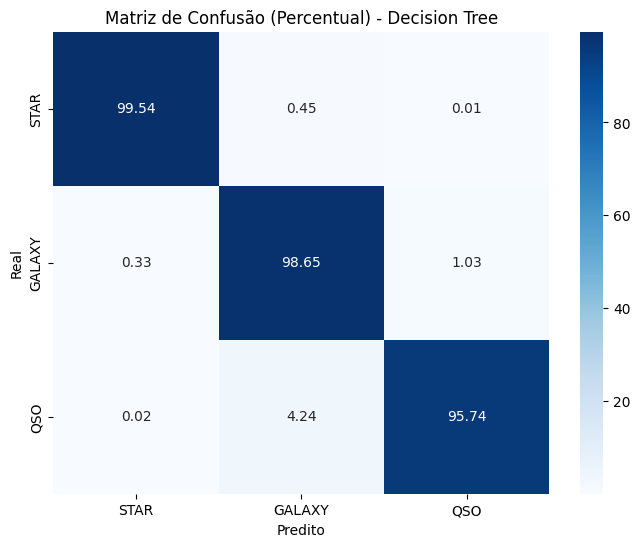

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Inicializando o modelo Decision Tree
modelo_dt = DecisionTreeClassifier(random_state=1)

# Avaliando o modelo
avaliar_modelo("Decision Tree", modelo_dt, X_train, X_test, y_train, y_test)



Treinando o modelo: Random Forest...
Modelo Random Forest avaliado com sucesso!
Acurácia: 99.02%, F1-Score: 99.01%, ROC-AUC: 99.78183728198168

Validação Cruzada - Média: 99.00%, Desvio Padrão: 0.03%



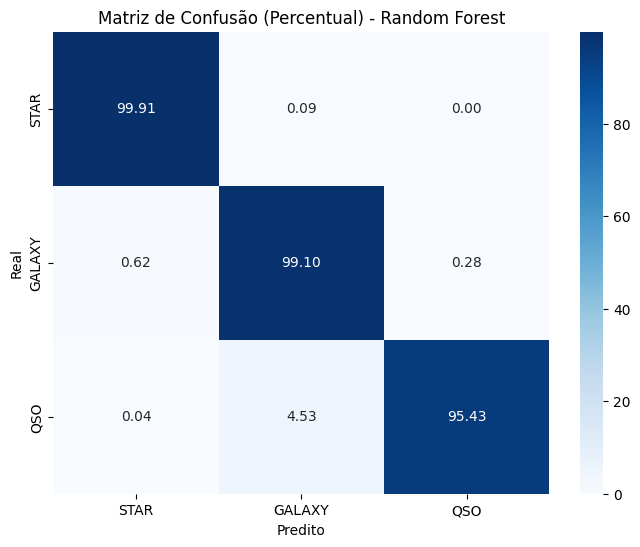

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Inicializando o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=1, n_estimators=100)

# Avaliando o modelo
avaliar_modelo("Random Forest", modelo_rf, X_train, X_test, y_train, y_test)



Treinando o modelo: Gradient Boosting...
Modelo Gradient Boosting avaliado com sucesso!
Acurácia: 98.77%, F1-Score: 98.77%, ROC-AUC: 99.70784120481339

Validação Cruzada - Média: 98.76%, Desvio Padrão: 0.03%



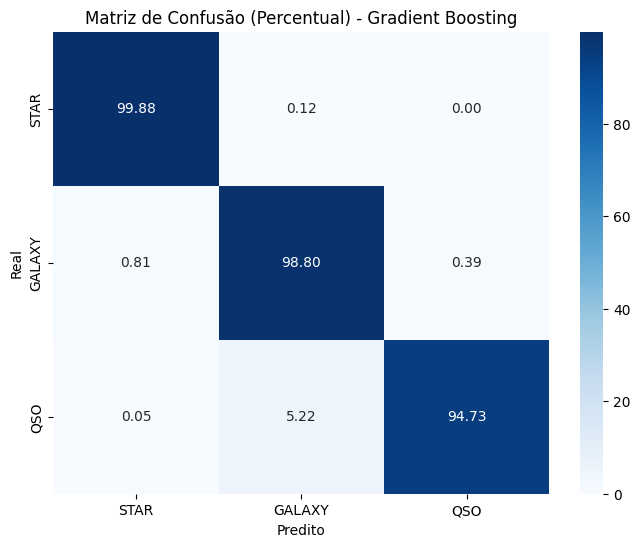

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializando o modelo Gradient Boosting
modelo_gb = GradientBoostingClassifier(random_state=1, n_estimators=100, learning_rate=0.1)

# Avaliando o modelo
avaliar_modelo("Gradient Boosting", modelo_gb, X_train, X_test, y_train, y_test)



Treinando o modelo: Logistic Regression...
Modelo Logistic Regression avaliado com sucesso!
Acurácia: 94.03%, F1-Score: 94.04%, ROC-AUC: 98.62285988737108

Validação Cruzada - Média: 93.40%, Desvio Padrão: 0.17%



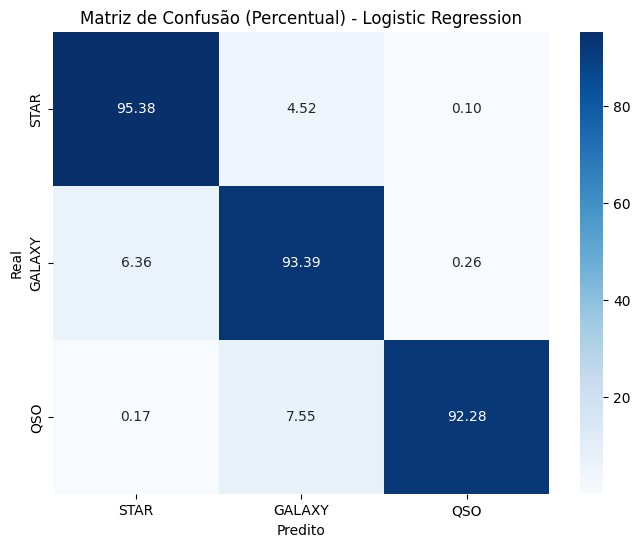

In [10]:
from sklearn.linear_model import LogisticRegression

# Inicializando o modelo Logistic Regression
modelo_lr = LogisticRegression(random_state=1, max_iter=1000)

# Avaliando o modelo
avaliar_modelo("Logistic Regression", modelo_lr, X_train, X_test, y_train, y_test)



Treinando o modelo: Naive Bayes...
Modelo Naive Bayes avaliado com sucesso!
Acurácia: 97.27%, F1-Score: 97.31%, ROC-AUC: 98.65643607048709

Validação Cruzada - Média: 97.21%, Desvio Padrão: 0.14%



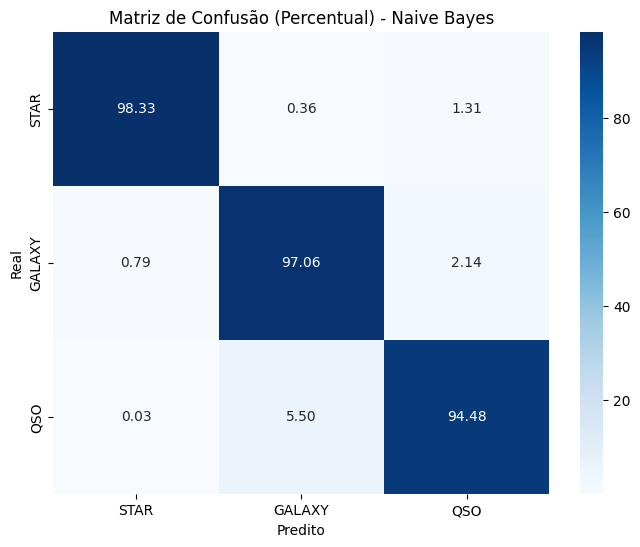

In [11]:
from sklearn.naive_bayes import GaussianNB

# Inicializando o modelo Naive Bayes (Gaussian)
modelo_nb = GaussianNB()

# Avaliando o modelo
avaliar_modelo("Naive Bayes", modelo_nb, X_train, X_test, y_train, y_test)



Treinando o modelo: Rede Neural Rasa (MLP)...
Modelo Rede Neural Rasa (MLP) avaliado com sucesso!
Acurácia: 98.70%, F1-Score: 98.70%, ROC-AUC: 99.69234353755421

Validação Cruzada - Média: 98.66%, Desvio Padrão: 0.06%



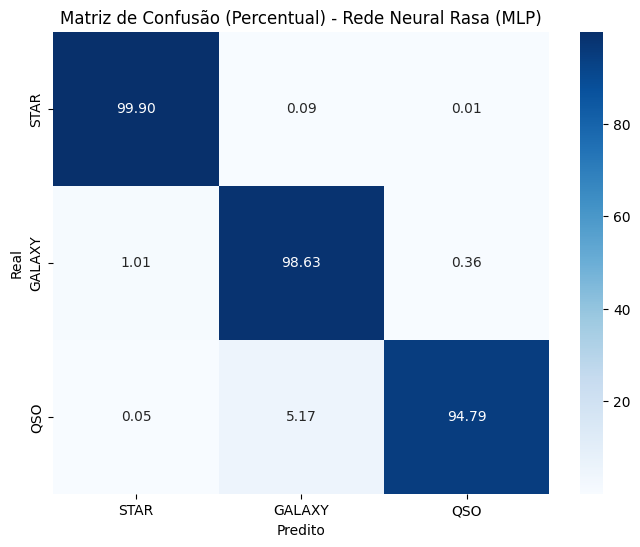

In [12]:
from sklearn.neural_network import MLPClassifier

# Inicializando o modelo MLPClassifier
modelo_mlp = MLPClassifier(hidden_layer_sizes=(60,), max_iter=300, random_state=1)

# Avaliando o modelo
avaliar_modelo("Rede Neural Rasa (MLP)", modelo_mlp, X_train, X_test, y_train, y_test)


### Extra



Treinando o modelo: Support Vector Machine (Linear SVC)...


/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of

Modelo Support Vector Machine (Linear SVC) avaliado com sucesso!
Acurácia: 97.44%, F1-Score: 97.42%, ROC-AUC: N/A

Validação Cruzada - Média: 97.48%, Desvio Padrão: 0.04%



/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


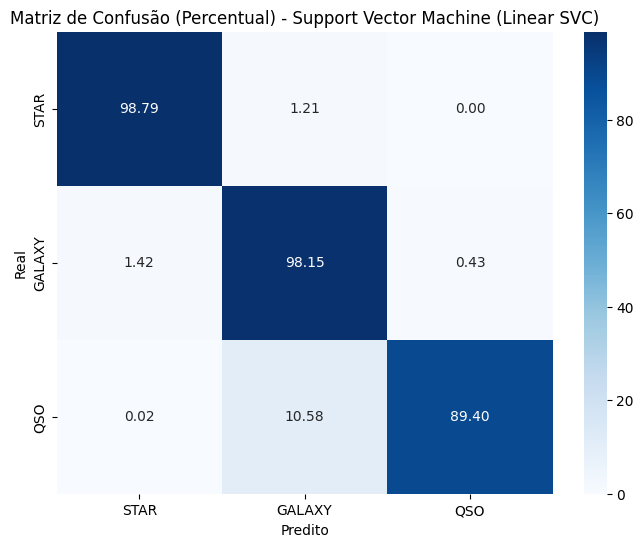

In [13]:
# from sklearn.svm import SVC

# Inicializando o modelo SVM
# modelo_svm = SVC(kernel='rbf', random_state=1)

# Avaliando o modelo
# avaliar_modelo(False,"Support Vector Machine (SVM)", modelo_svm, X_train, X_test, y_train, y_test)

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Criando o pipeline com StandardScaler e LinearSVC
modelo_svm = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('svc', LinearSVC(random_state=1, max_iter=1000))  # Modelo LinearSVC
])

# Avaliando o modelo
avaliar_modelo("Support Vector Machine (Linear SVC)", modelo_svm, X_train, X_test, y_train, y_test)



Treinando o modelo: Extra Trees Classifier...
Modelo Extra Trees Classifier avaliado com sucesso!
Acurácia: 98.56%, F1-Score: 98.56%, ROC-AUC: 99.5796021219447

Validação Cruzada - Média: 98.53%, Desvio Padrão: 0.02%



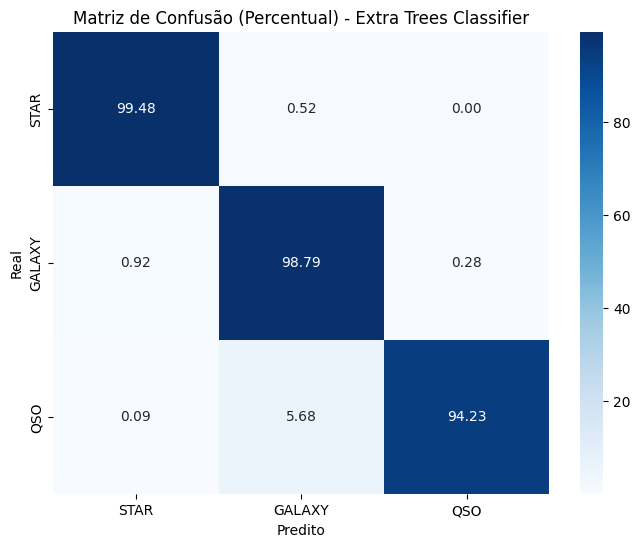

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

# Inicializando o modelo Extra Trees
modelo_et = ExtraTreesClassifier(random_state=1)

# Avaliando o modelo
avaliar_modelo("Extra Trees Classifier", modelo_et, X_train, X_test, y_train, y_test)



Treinando o modelo: Stochastic Gradient Descent (SGD)...
Modelo Stochastic Gradient Descent (SGD) avaliado com sucesso!
Acurácia: 81.17%, F1-Score: 81.07%, ROC-AUC: N/A

Validação Cruzada - Média: 81.02%, Desvio Padrão: 0.09%



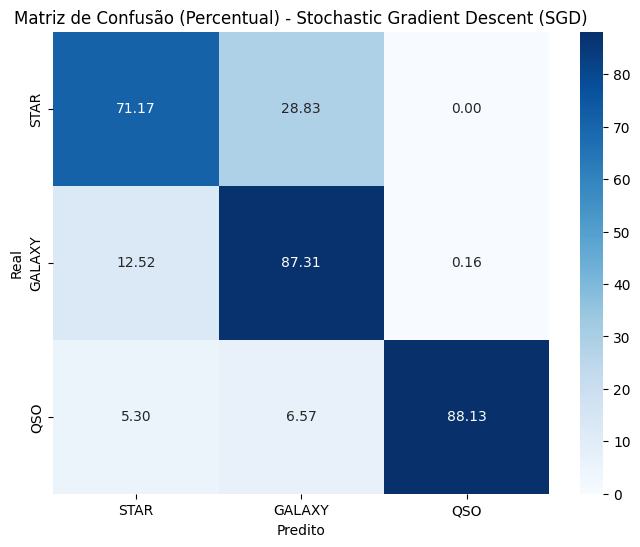

In [15]:
from sklearn.linear_model import SGDClassifier

# Inicializando o modelo SGDClassifier
modelo_sgd = SGDClassifier(loss='hinge', random_state=1)

# Avaliando o modelo
avaliar_modelo("Stochastic Gradient Descent (SGD)", modelo_sgd, X_train, X_test, y_train, y_test)



Treinando o modelo: K-Nearest Neighbors (KNN)...
Modelo K-Nearest Neighbors (KNN) avaliado com sucesso!
Acurácia: 88.38%, F1-Score: 88.30%, ROC-AUC: 94.10182205579393

Validação Cruzada - Média: 87.94%, Desvio Padrão: 0.06%



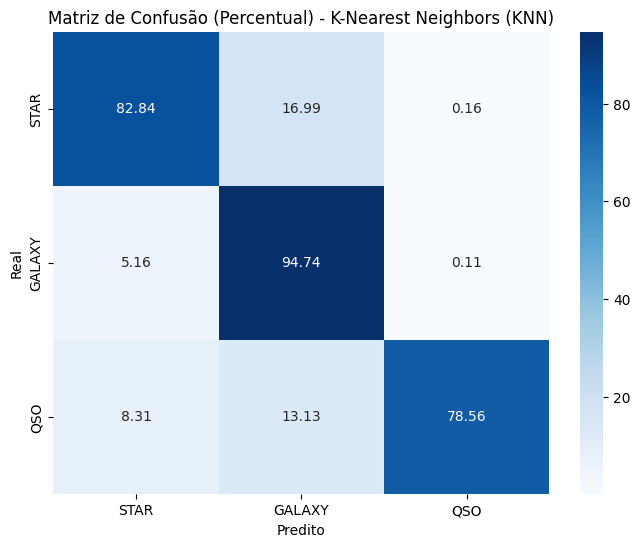

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializando o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Avaliando o modelo
avaliar_modelo("K-Nearest Neighbors (KNN)", modelo_knn, X_train, X_test, y_train, y_test)



Treinando o modelo: AdaBoost Classifier...


/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

Modelo AdaBoost Classifier avaliado com sucesso!
Acurácia: 93.04%, F1-Score: 92.32%, ROC-AUC: 95.20872661040812

Validação Cruzada - Média: 92.65%, Desvio Padrão: 1.14%



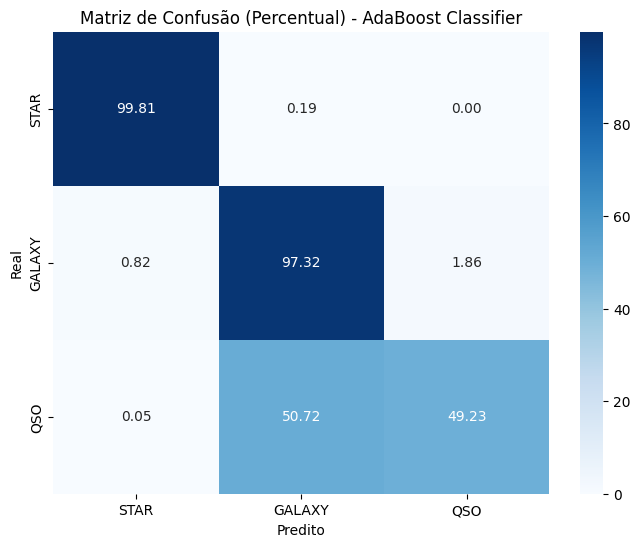

In [17]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializando o modelo AdaBoost
modelo_ab = AdaBoostClassifier(random_state=1, n_estimators=50)

# Avaliando o modelo
avaliar_modelo("AdaBoost Classifier", modelo_ab, X_train, X_test, y_train, y_test)



Tabela de Métricas de Desempenho:


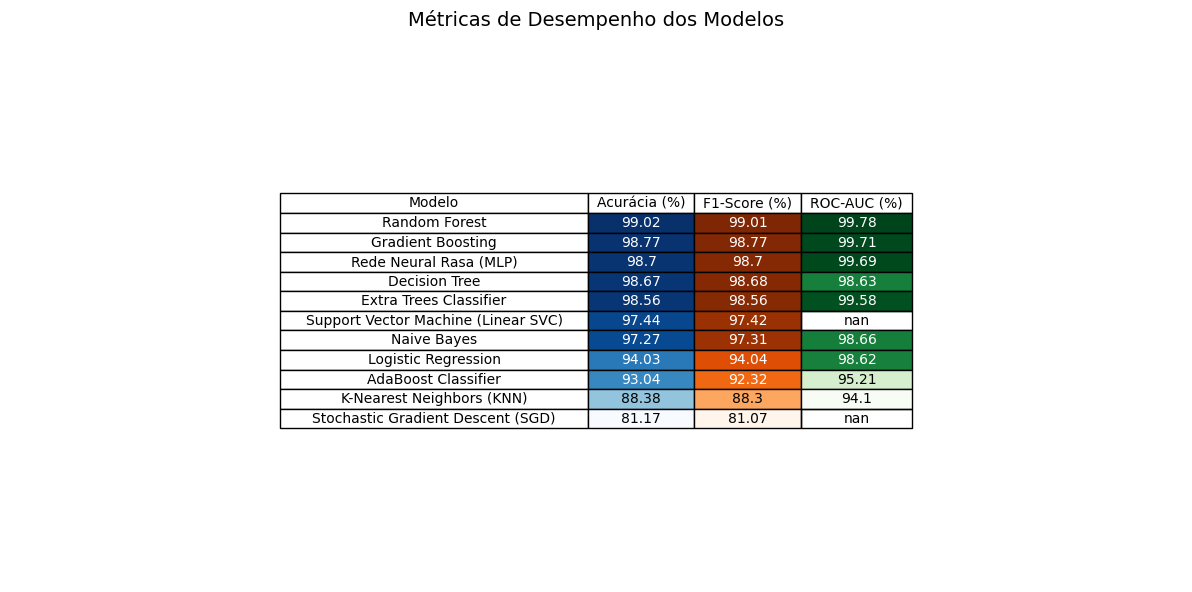


Tabela de Tempos e Validação Cruzada:


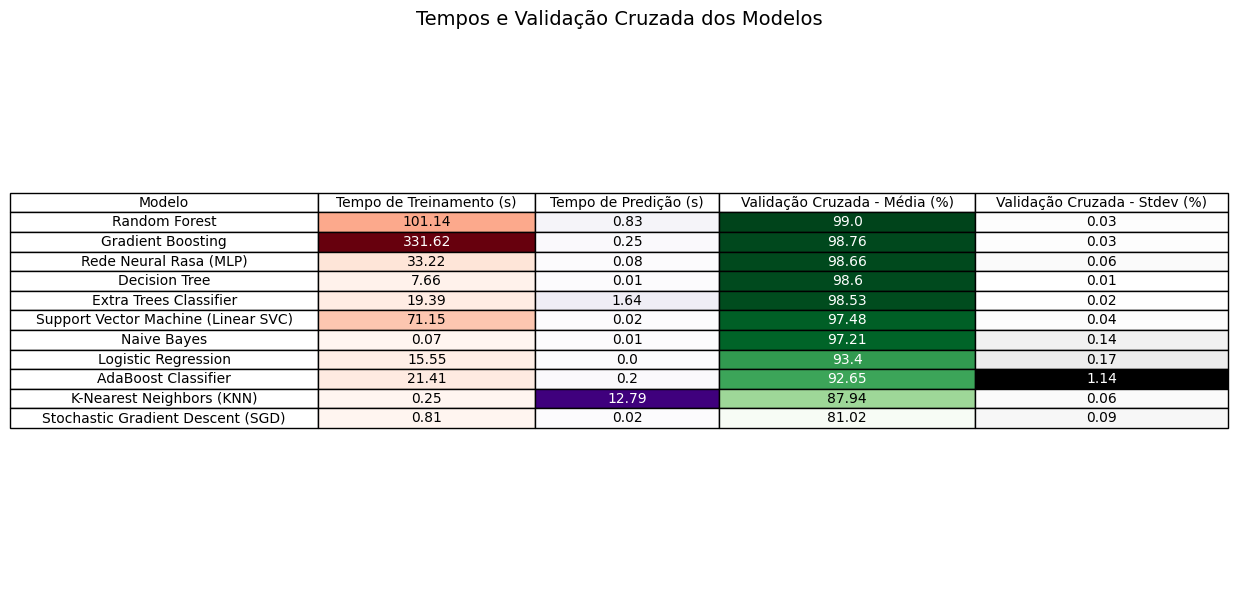

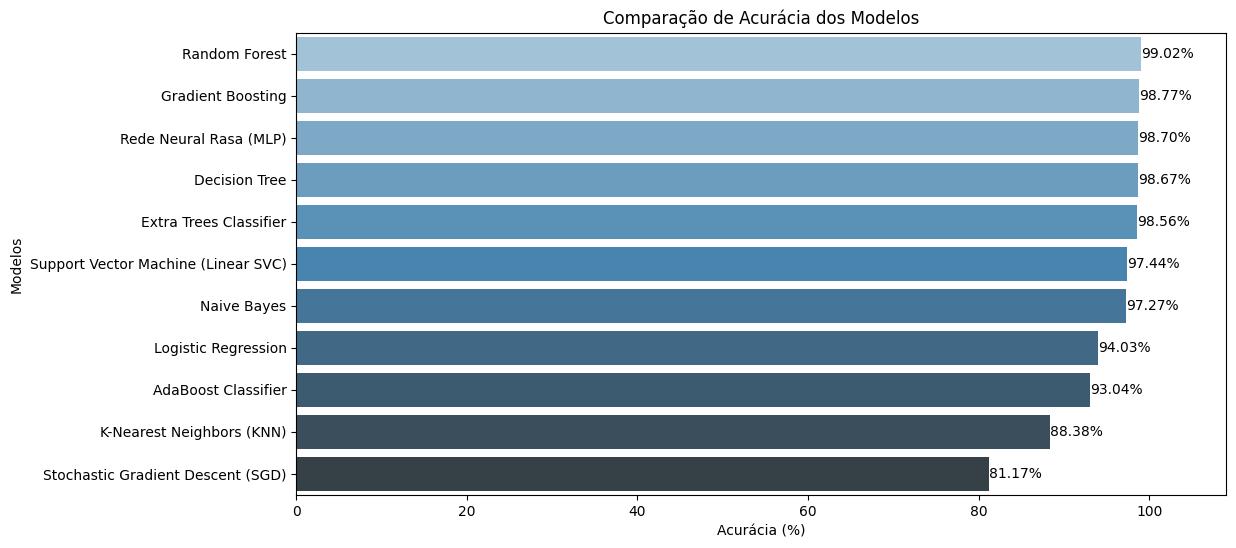

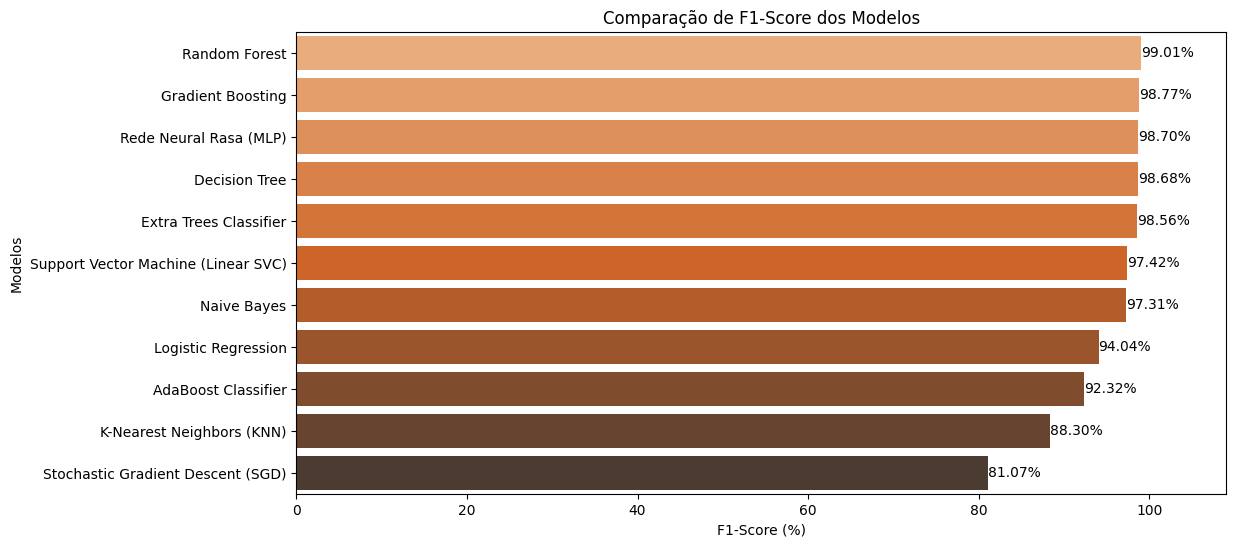

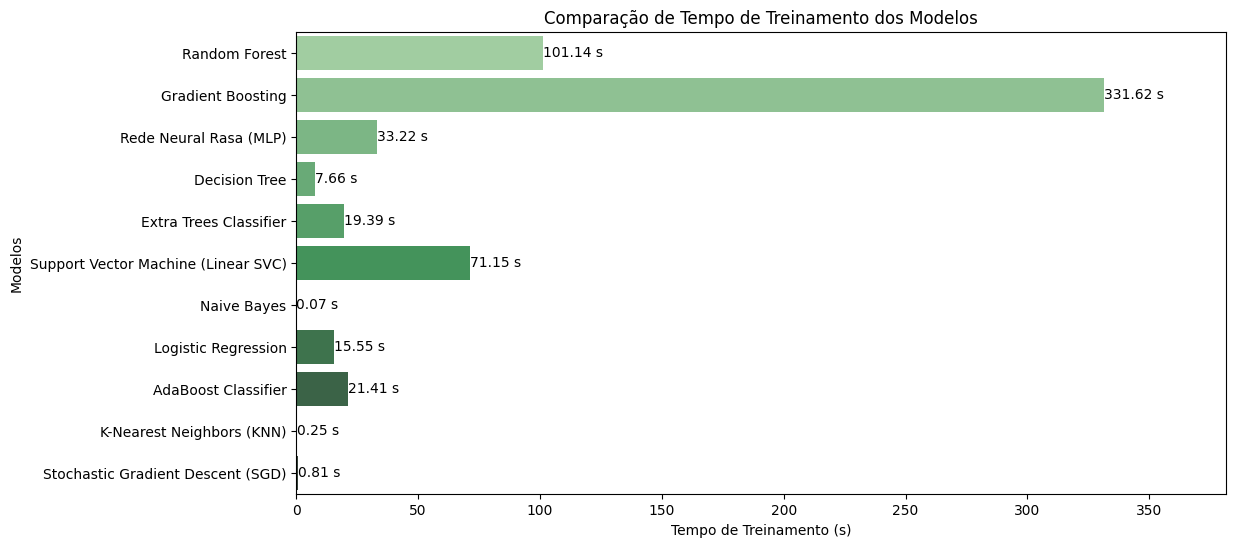

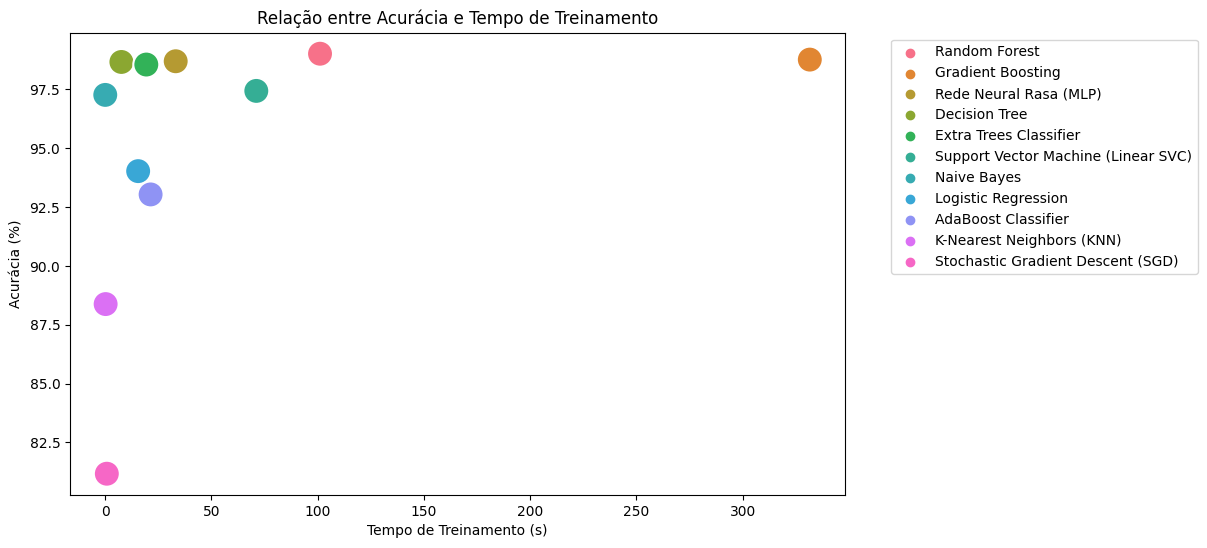

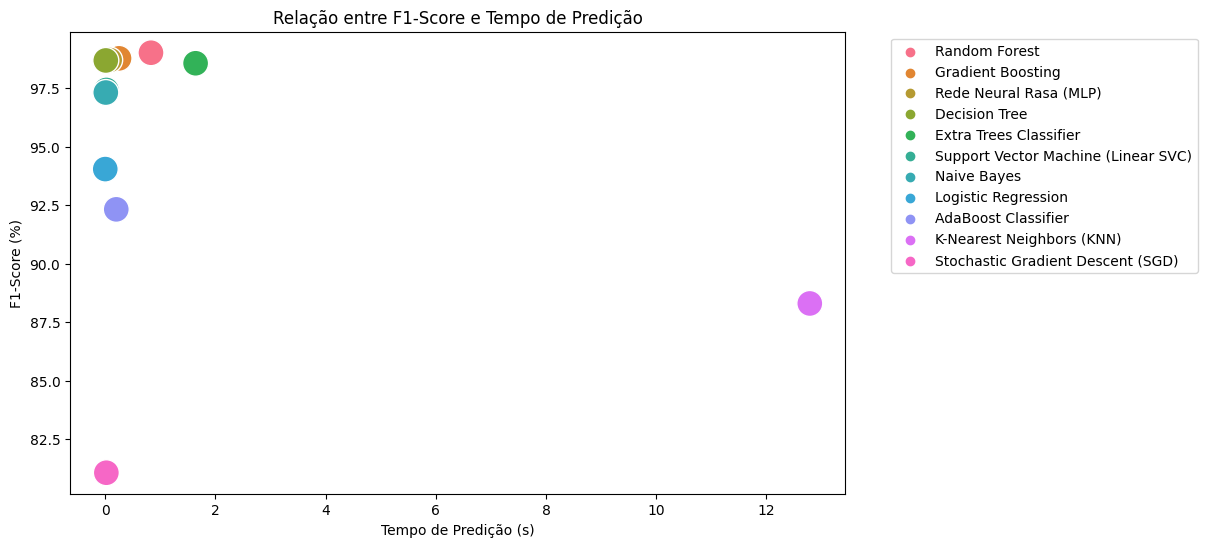

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consolidando os resultados em um DataFrame
resultados_df = pd.DataFrame(resultados_modelos)

# Ordenando os resultados pela Acurácia
resultados_df.sort_values(by="Acurácia (%)", ascending=False, inplace=True)

# Convertendo colunas numéricas para o formato correto
cols_to_convert = ["Acurácia (%)", "F1-Score (%)", "ROC-AUC (%)", "Tempo de Treinamento (s)", "Tempo de Predição (s)", "Validação Cruzada - Média (%)", "Validação Cruzada - Stdev (%)"]
for col in cols_to_convert:
    resultados_df[col] = pd.to_numeric(resultados_df[col], errors='coerce')

# Dividindo os dados para melhorar a visualização
heatmap_data_metrics = resultados_df[["Modelo", "Acurácia (%)", "F1-Score (%)", "ROC-AUC (%)"]]
heatmap_data_times = resultados_df[["Modelo", "Tempo de Treinamento (s)", "Tempo de Predição (s)", "Validação Cruzada - Média (%)", "Validação Cruzada - Stdev (%)"]]

# Função para criar tabela visual
def plot_table(data, title, col_palettes):
    # Cálculo do range para cada coluna
    col_ranges = {
        col: (data[col].min(), data[col].max())
        for col in data.columns if data[col].dtype in [float, int]
    }
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('off')  # Remover os eixos

    # Adicionando a tabela ao gráfico
    table = ax.table(
        cellText=data.values,
        colLabels=data.columns,
        loc='center',
        cellLoc='center',
        colLoc='center'
    )

    # Ajustando estilo da tabela
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(data.columns))))

    # Aplicando gradiente para cada célula numérica
    for (row, col), cell in table._cells.items():
        if row > 0 and col > 0:  # Apenas células de métricas (não incluir "Modelo")
            column_name = data.columns[col]
            if column_name in col_ranges:  # Garantir que é uma métrica numérica
                value = data.iloc[row - 1, col]
                min_val, max_val = col_ranges[column_name]
                normalized_value = (value - min_val) / (max_val - min_val) if max_val > min_val else 0.5
                cell_color = col_palettes.get(column_name, plt.cm.Blues)(normalized_value)

                # Aplicar cor de fundo e ajustar cor da fonte
                cell.set_facecolor(cell_color)
                text_color = "white" if normalized_value > 0.6 else "black"
                cell.get_text().set_color(text_color)
        else:
            cell.set_facecolor('white')  # Fundo branco para cabeçalhos

    plt.title(title, fontsize=14, pad=10)
    plt.tight_layout(pad=1)
    plt.show()

# Definindo paletas de cores específicas para cada métrica
col_palettes_metrics = {
    "Acurácia (%)": plt.cm.Blues,
    "F1-Score (%)": plt.cm.Oranges,
    "ROC-AUC (%)": plt.cm.Greens,
}

col_palettes_times = {
    "Tempo de Treinamento (s)": plt.cm.Reds,
    "Tempo de Predição (s)": plt.cm.Purples,
    "Validação Cruzada - Média (%)": plt.cm.Greens,
    "Validação Cruzada - Stdev (%)": plt.cm.Greys,
}

# Plotando as tabelas
print("\nTabela de Métricas de Desempenho:")
plot_table(heatmap_data_metrics, "Métricas de Desempenho dos Modelos", col_palettes_metrics)

print("\nTabela de Tempos e Validação Cruzada:")
plot_table(heatmap_data_times, "Tempos e Validação Cruzada dos Modelos", col_palettes_times)



# Gráfico 1: Comparação de Acurácia
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Acurácia (%)", y="Modelo", data=resultados_df, palette="Blues_d")
plt.title("Comparação de Acurácia dos Modelos")
plt.xlabel("Acurácia (%)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["Acurácia (%)"].max() + 10)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()

# Gráfico 2: Comparação de F1-Score
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="F1-Score (%)", y="Modelo", data=resultados_df, palette="Oranges_d")
plt.title("Comparação de F1-Score dos Modelos")
plt.xlabel("F1-Score (%)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["F1-Score (%)"].max() + 10)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()

# Gráfico 3: Comparação de Tempo de Treinamento
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Tempo de Treinamento (s)", y="Modelo", data=resultados_df, palette="Greens_d")
plt.title("Comparação de Tempo de Treinamento dos Modelos")
plt.xlabel("Tempo de Treinamento (s)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["Tempo de Treinamento (s)"].max() + 50)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f s")
plt.show()

# Gerar um dicionário de cores único baseado nos modelos
palette = sns.color_palette("husl", n_colors=len(resultados_df["Modelo"]))
model_colors = dict(zip(resultados_df["Modelo"], palette))

# Gráfico 4: Scatter Plot de Acurácia vs. Tempo de Treinamento
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Tempo de Treinamento (s)", y="Acurácia (%)", hue="Modelo", data=resultados_df, palette=model_colors, s=350)
plt.title("Relação entre Acurácia e Tempo de Treinamento")
plt.xlabel("Tempo de Treinamento (s)")
plt.ylabel("Acurácia (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico 5: Scatter Plot de F1-Score vs. Tempo de Predição
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Tempo de Predição (s)", y="F1-Score (%)", hue="Modelo", data=resultados_df, palette=model_colors, s=350, edgecolor='w', linewidth=1)  
plt.title("Relação entre F1-Score e Tempo de Predição")
plt.xlabel("Tempo de Predição (s)")
plt.ylabel("F1-Score (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


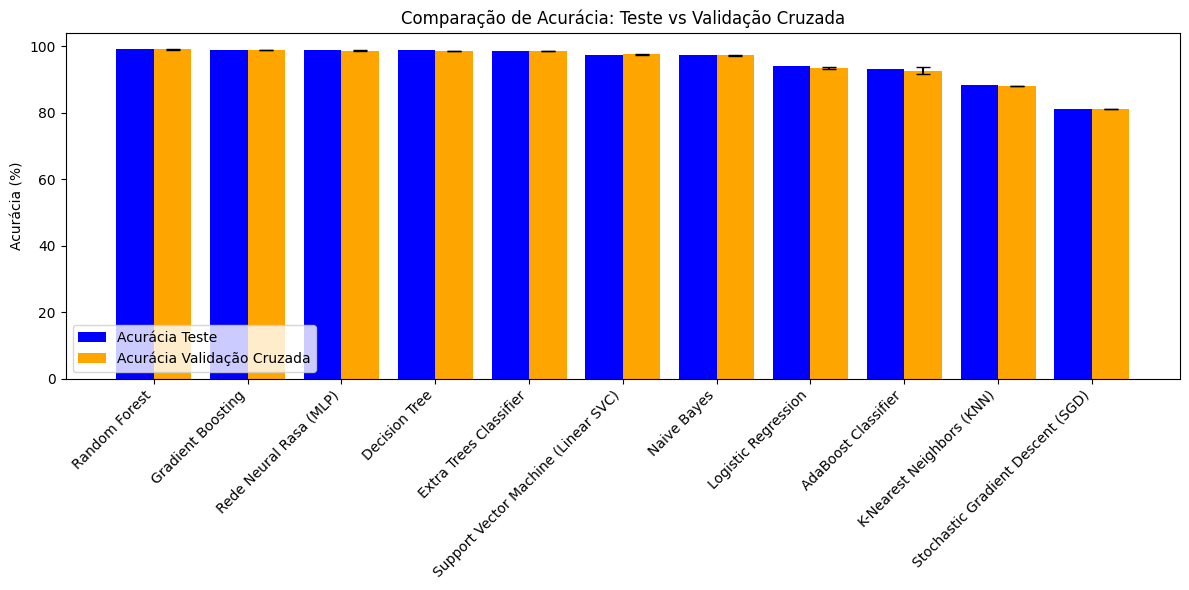

In [19]:
# Ordenando os modelos por Acurácia Teste
resultados_df = resultados_df.sort_values(by="Acurácia (%)", ascending=False)

# Dados atualizados
modelos = resultados_df["Modelo"]
acc_test = resultados_df["Acurácia (%)"]
acc_val_mean = resultados_df["Validação Cruzada - Média (%)"]
acc_val_std = resultados_df["Validação Cruzada - Stdev (%)"]

x = np.arange(len(modelos))  # Posição dos modelos
width = 0.4  # Largura das barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras de teste
ax.bar(x - width/2, acc_test, width, label="Acurácia Teste", color="blue")

# Barras de validação cruzada
ax.bar(x + width/2, acc_val_mean, width, yerr=acc_val_std, label="Acurácia Validação Cruzada", color="orange", capsize=5)

# Adicionando valores nas barras
""" 
for i, v in enumerate(acc_test):
    ax.text(i - 0.5, v + 0.5, f"{v:.1f}%", color="blue", ha="center", fontsize=10)

for i, v in enumerate(acc_val_mean):
    ax.text(i + 0.5, v + 0.5, f"{v:.1f}%", color="orange", ha="center", fontsize=10)
"""

# Personalização do gráfico
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha="right")
ax.set_ylabel("Acurácia (%)")
ax.set_title("Comparação de Acurácia: Teste vs Validação Cruzada")
ax.legend()

plt.tight_layout()
plt.show()


Heatmap de Erros por Classe e Modelo:


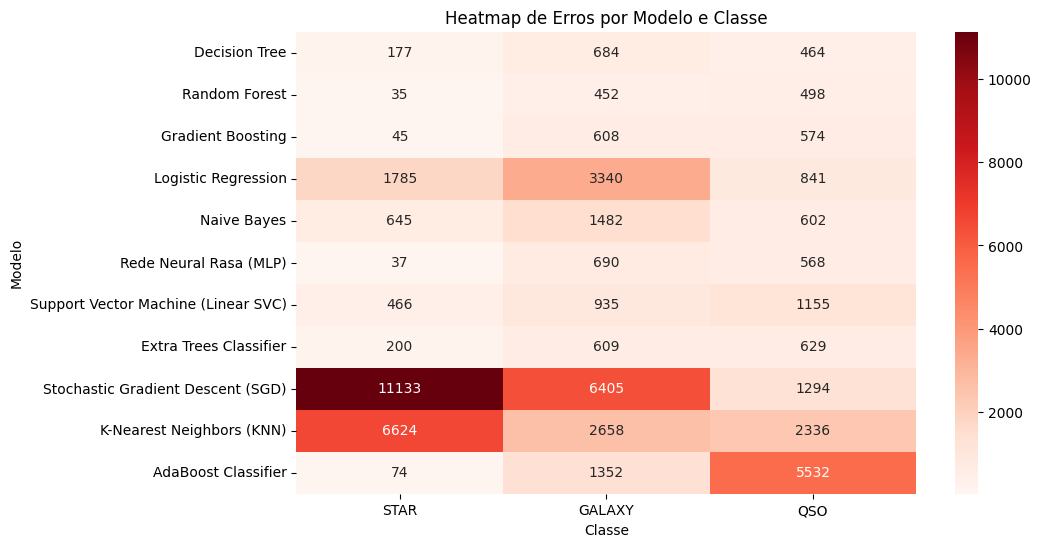


Gráficos de Barras para Cada Classe:


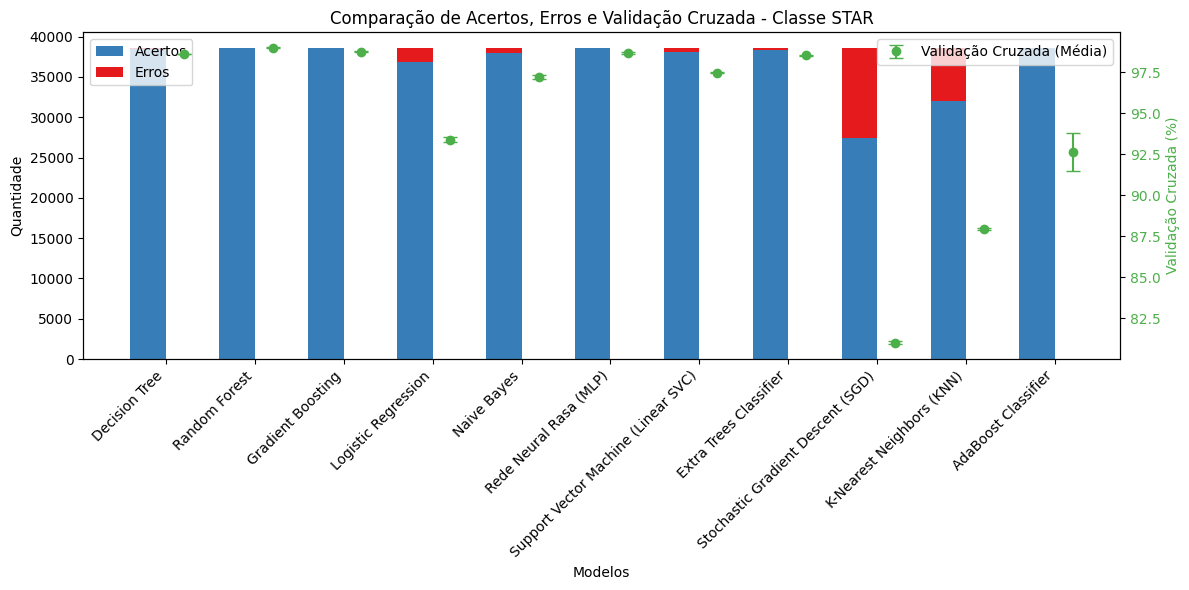

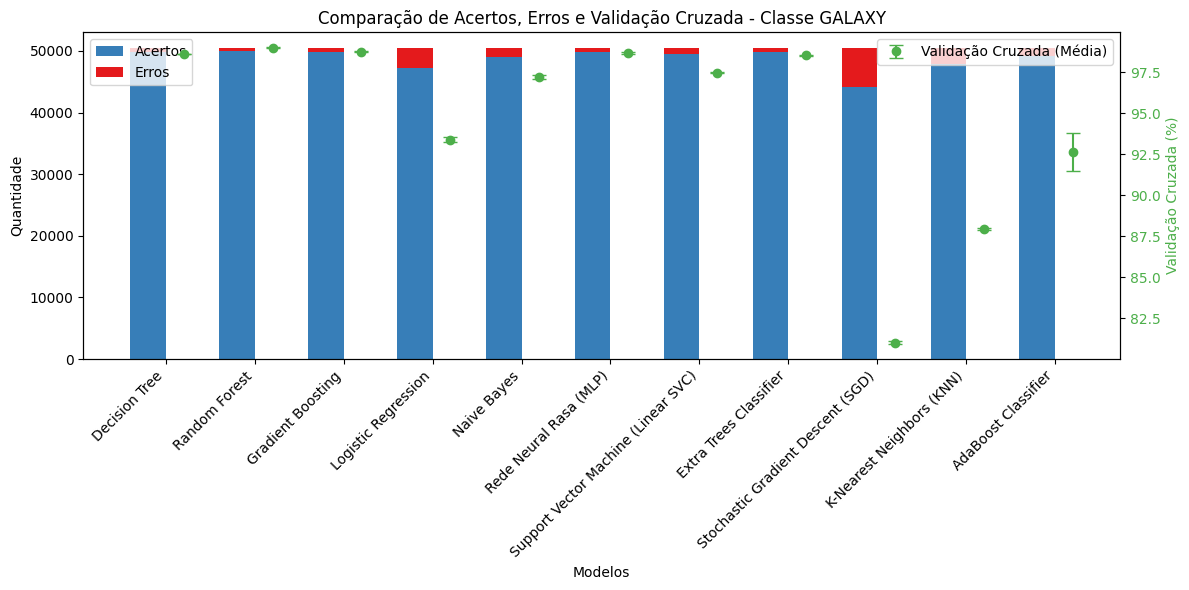

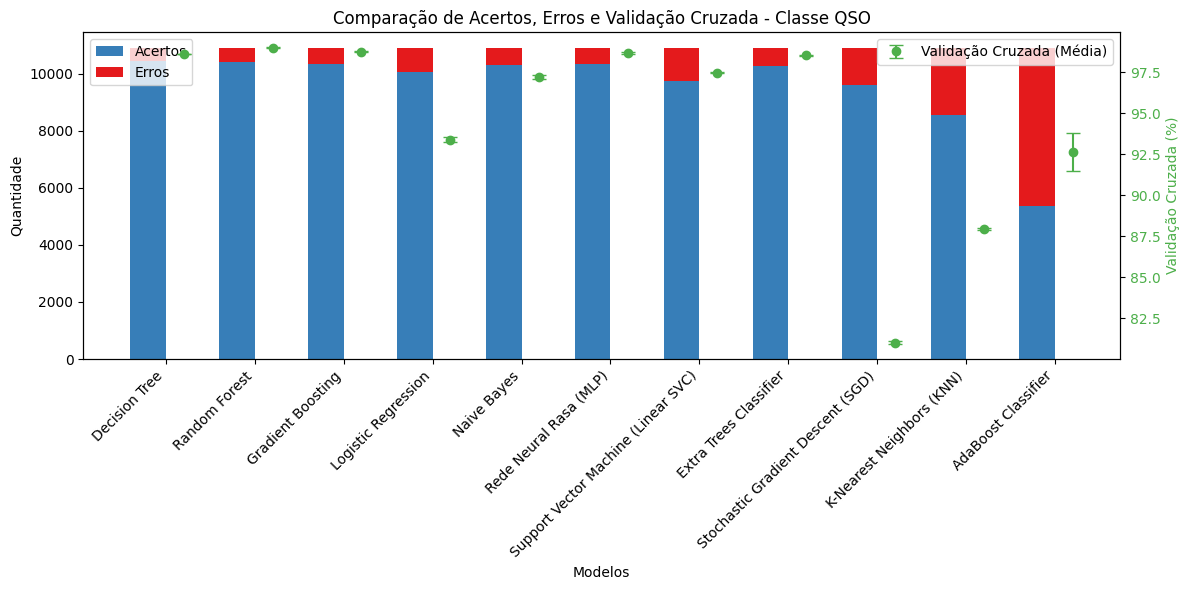


Curvas de Métricas para Cada Classe:


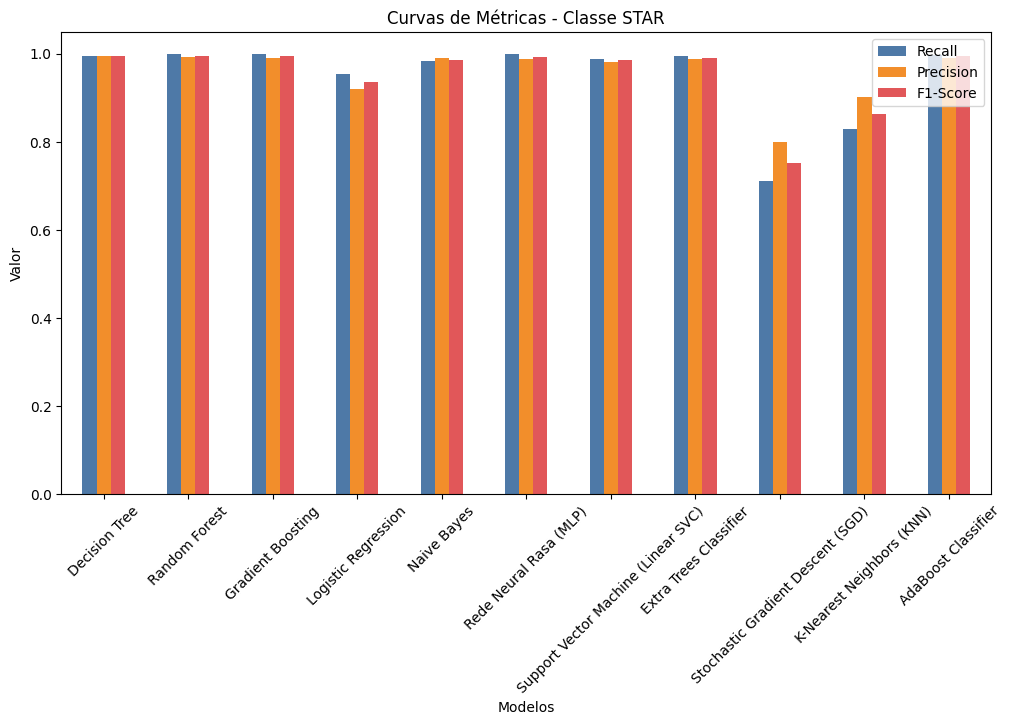

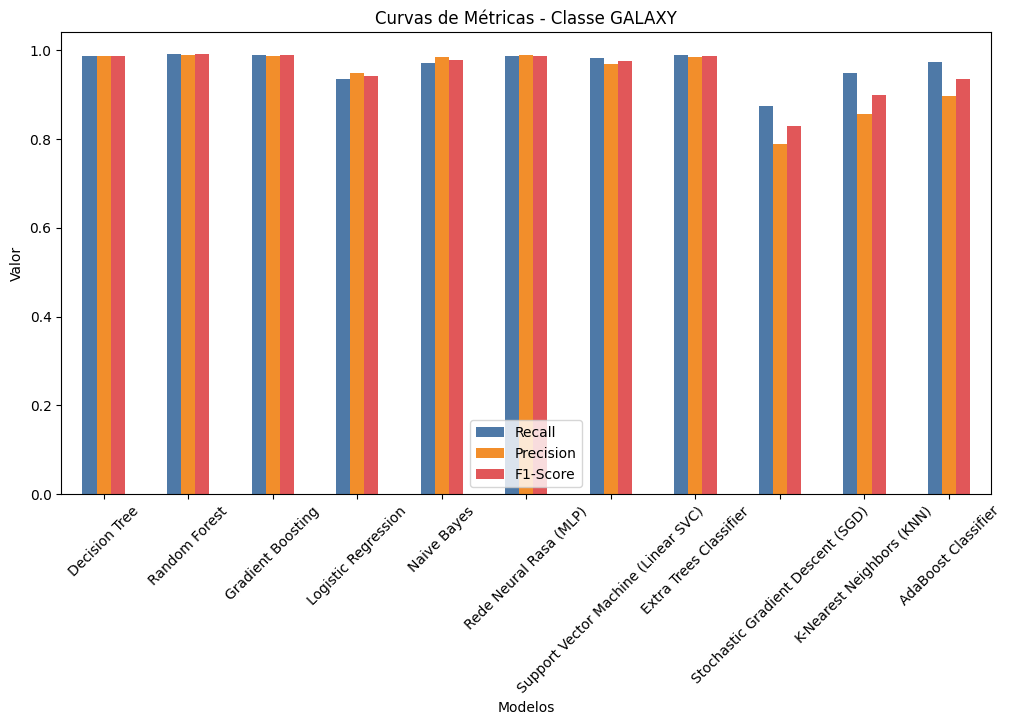

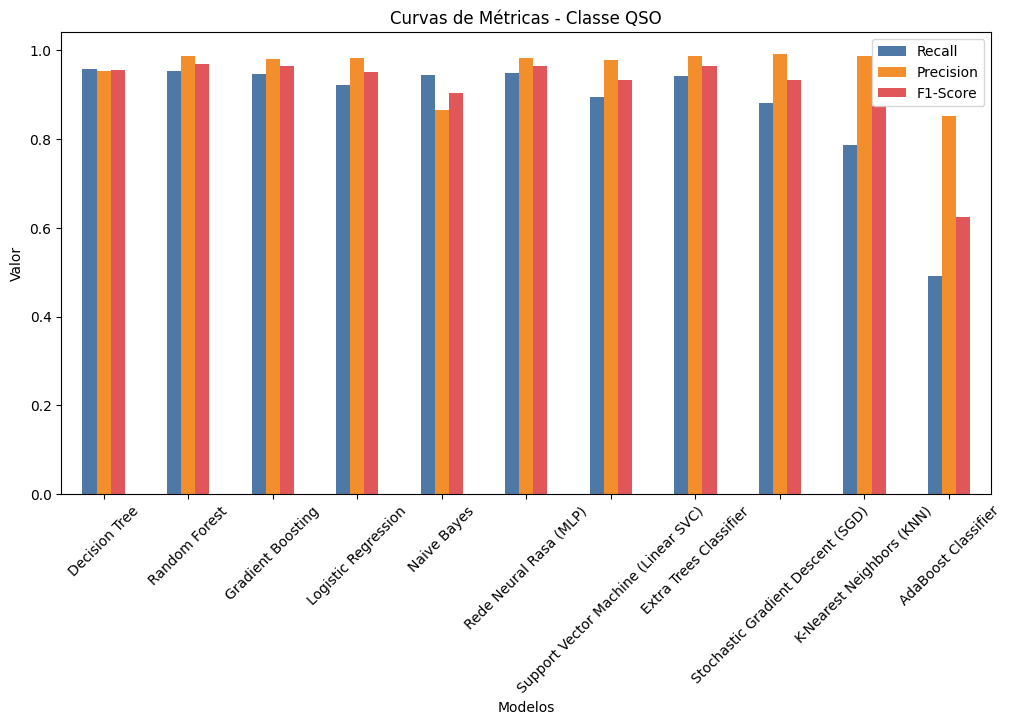

: 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score

# Decodificando as classes
class_mapping = {0: 'STAR', 1: 'GALAXY', 2: 'QSO'}
class_names = list(class_mapping.values())

# 1. Heatmap de Erros por Classe e Modelo
def plot_heatmap(resultados_modelos):
    num_classes = len(class_names)
    erros_por_modelo = []

    for modelo in resultados_modelos:
        cm = modelo["Matriz Confusão"]
        erros = [sum(cm[classe]) - cm[classe][classe] for classe in range(num_classes)]
        erros_por_modelo.append(erros)

    erros_df = pd.DataFrame(erros_por_modelo, columns=class_names)
    erros_df["Modelo"] = [modelo["Modelo"] for modelo in resultados_modelos]
    erros_df.set_index("Modelo", inplace=True)

    # Plotando o Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(erros_df, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=erros_df.index)
    plt.title("Heatmap de Erros por Modelo e Classe")
    plt.xlabel("Classe")
    plt.ylabel("Modelo")
    plt.show()

# 2. Gráfico de Barras para Acertos, Erros e Validação Cruzada de Cada Classe
def plot_barras(resultados_modelos, classe_idx):
    # Verificando se a classe existe no mapeamento
    classe_name = class_mapping.get(classe_idx)
    if not classe_name:
        raise ValueError(f"Classe índice {classe_idx} não encontrada no mapeamento {class_mapping}.")

    resultados_classe = []

    for modelo in resultados_modelos:
        cm = modelo["Matriz Confusão"]
        acertos = cm[classe_idx][classe_idx]
        erros = sum(cm[classe_idx]) - acertos
        acc_val_mean = modelo.get("Validação Cruzada - Média (%)", 0)
        acc_val_std = modelo.get("Validação Cruzada - Stdev (%)", 0)
        resultados_classe.append({
            "Modelo": modelo["Modelo"],
            "Acertos": acertos,
            "Erros": erros,
            "Validação Cruzada - Média (%)": acc_val_mean,
            "Validação Cruzada - Stdev (%)": acc_val_std
        })

    resultados_classe_df = pd.DataFrame(resultados_classe)
    resultados_classe_df.set_index("Modelo", inplace=True)
    
    # Gráfico de Barras com dois eixos Y
    fig, ax1 = plt.subplots(figsize=(12, 6))
    bar_width = 0.4  # Largura das barras
    modelos = resultados_classe_df.index
    x = np.arange(len(modelos))

    # Eixo para Acertos e Erros
    ax1.bar(x - bar_width / 2, resultados_classe_df["Acertos"], width=bar_width, label="Acertos", color="#377eb8")
    ax1.bar(x - bar_width / 2, resultados_classe_df["Erros"], bottom=resultados_classe_df["Acertos"], width=bar_width, label="Erros", color="#e41a1c")
    ax1.set_ylabel("Quantidade", color="black")
    ax1.set_xlabel("Modelos")
    ax1.set_xticks(x)
    ax1.set_xticklabels(modelos, rotation=45, ha="right")
    ax1.legend(loc="upper left")
    ax1.set_title(f"Comparação de Acertos, Erros e Validação Cruzada - Classe {classe_name}")

    # Segundo eixo Y para Validação Cruzada
    ax2 = ax1.twinx()
    ax2.errorbar(x + bar_width / 2, resultados_classe_df["Validação Cruzada - Média (%)"], 
                 yerr=resultados_classe_df["Validação Cruzada - Stdev (%)"], 
                 fmt='o', color="#4daf4a", label="Validação Cruzada (Média)", capsize=5)
    ax2.set_ylabel("Validação Cruzada (%)", color="#4daf4a")
    ax2.tick_params(axis='y', labelcolor="#4daf4a")
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


# 3. Curvas de Métricas para Cada Classe
def plot_curvas_metricas(resultados_modelos, classe_idx):
    classe_name = class_mapping.get(classe_idx)
    if not classe_name:
        raise ValueError(f"Classe índice {classe_idx} não encontrada no mapeamento {class_mapping}.")

    recalls, precisions, f1_scores = [], [], []

    for modelo in resultados_modelos:
        y_pred = modelo["Predições"]
        y_test = modelo["Reais"]

        recall = recall_score(y_test, y_pred, labels=[classe_idx], average=None)[0]
        precision = precision_score(y_test, y_pred, labels=[classe_idx], average=None)[0]
        f1 = f1_score(y_test, y_pred, labels=[classe_idx], average=None)[0]

        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1)

    metricas_df = pd.DataFrame({
        "Modelo": [modelo["Modelo"] for modelo in resultados_modelos],
        "Recall": recalls,
        "Precision": precisions,
        "F1-Score": f1_scores
    })
    metricas_df.set_index("Modelo", inplace=True)

    metricas_df.plot(kind="bar", figsize=(12, 6), color=["#4E79A7", "#F28E2B", "#E15759"])
    plt.title(f"Curvas de Métricas - Classe {classe_name}")
    plt.xlabel("Modelos")
    plt.ylabel("Valor")
    plt.legend(["Recall", "Precision", "F1-Score"])
    plt.xticks(rotation=45)
    plt.show()

# Chamando as funções
print("Heatmap de Erros por Classe e Modelo:")
plot_heatmap(resultados_modelos)

print("\nGráficos de Barras para Cada Classe:")
for classe_idx in range(len(class_mapping)):  # Para as classes STAR (0), GALAXY (1), QSO (2)
    plot_barras(resultados_modelos, classe_idx)

print("\nCurvas de Métricas para Cada Classe:")
for classe_idx in range(len(class_mapping)):  # Para as classes STAR (0), GALAXY (1), QSO (2)
    plot_curvas_metricas(resultados_modelos, classe_idx)
